In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd

In [3]:
# abs_FOMs
ecut_abs_x_axis_labels = ['3e-3', '6e-3', '9e-3', '12e-3']
ecut_rel_x_axis_labels = ['5%', '10%', '15%', '20%']

ecut_abs_x_axis = [3e-3, 6e-3, 9e-3, 12e-3]
y_axis = [0,1]
xmesh, ymesh = np.meshgrid(ecut_abs_x_axis, y_axis, indexing = 'ij')

ecut_abs_tot_evt = [0, 2, 64, 242]
ecut_rel_tot_evt = [0, 48, 3074, 2396]

ecut_abs_sig_evt = [0, 34, 1855, 1469]
ecut_abs_sig_evt = [0, 1, 52, 182]

ecut_abs_FOMS = [0, 1.29, 3.171, 2.72]
ecut_rel_FOMS = [0, 1, 2.35, 3.49]

In [33]:
ecut_evt_stack = np.vstack((ecut_abs_tot_evt, ecut_rel_tot_evt))

In [43]:
print(ecut_evt_stack)
print(ecut_evt_stack[0])
print(len(ecut_evt_stack))
print(len(ecut_evt_stack[0]))

[[   0    2   64  242]
 [   0   48 3074 2396]]
[  0   2  64 242]
2
4


i,j
0 0
ecut_evt_stack[i,j]
0
ecut_abs_x_axis[j]
0.003
i,j
0 1
ecut_evt_stack[i,j]
2
ecut_abs_x_axis[j]
0.006
i,j
0 2
ecut_evt_stack[i,j]
64
ecut_abs_x_axis[j]
0.009
i,j
0 3
ecut_evt_stack[i,j]
242
ecut_abs_x_axis[j]
0.012
i,j
1 0
ecut_evt_stack[i,j]
0
ecut_abs_x_axis[j]
0.003
i,j
1 1
ecut_evt_stack[i,j]
48
ecut_abs_x_axis[j]
0.006
i,j
1 2
ecut_evt_stack[i,j]
3074
ecut_abs_x_axis[j]
0.009
i,j
1 3
ecut_evt_stack[i,j]
2396
ecut_abs_x_axis[j]
0.012


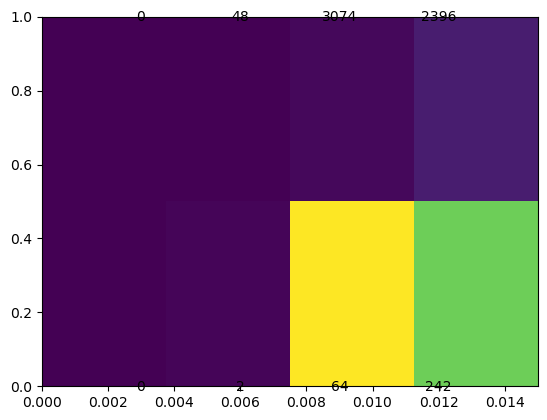

In [57]:
plt.imshow(ecut_evt_stack, interpolation='none', extent = [0,15e-3,0,1], aspect='auto')
#https://stackoverflow.com/questions/22158377/colorplot-of-2d-array-with-text-labels



for i in range(len(ecut_evt_stack)):
    for j in range(len(ecut_evt_stack[i])):
        print("i,j")
        print(i,j)
        print("ecut_evt_stack[i,j]")
        print(ecut_evt_stack[i,j])
        c = "{}".format(ecut_evt_stack[i,j])
        print("ecut_abs_x_axis[j]")
        print(ecut_abs_x_axis[j])
        plt.text(ecut_abs_x_axis[j],y_axis[i],c,va='center',ha='center')





In [100]:
# starting again, somewhat
array_1 = np.array([0,1,2,4,4,5,6,7])
array_2 = np.array([1,2,3,4,5,6,7,8])
array_3 = np.array([2,3,4,4,6,7,3,9])
array_4 = np.array([3,4,5,4,7,2,9,1])
array_5 = np.array([4,5,6,4,1,9,1,2])
array_6 = np.array([5,6,7,4,9,1,2,3])

array = np.hstack((array_1, array_2, array_3, array_4, array_5, array_6)).reshape(-1,array_1.shape[0])
print(array)
# off diag check
print(array[1,5], array[2,4], array[3,3])

[[0 1 2 4 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 4 6 7 3 9]
 [3 4 5 4 7 2 9 1]
 [4 5 6 4 1 9 1 2]
 [5 6 7 4 9 1 2 3]]
6 6 4


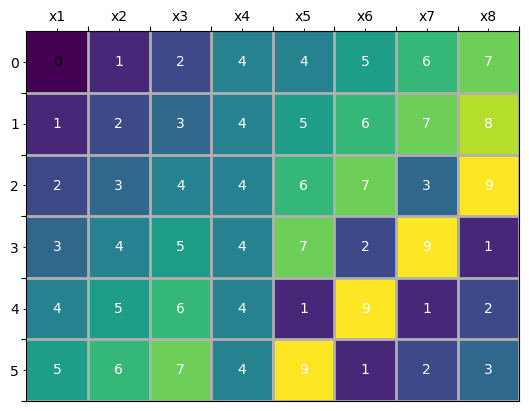

In [101]:
nx, ny = array.shape

indx, indy = np.arange(ny), np.arange(nx)
x, y = np.meshgrid(indx, indy, indexing='ij')

fig, ax = plt.subplots()
ax.imshow(array, interpolation="none")

for xval, yval in zip(y.flatten(), x.flatten()):
    zval = array[xval, yval]
    t = zval # format value with 1 decimal point
    c = 'w' if zval > 0.75 else 'k' # if dark-green, change text color to white
    ax.text(yval, xval, t, color=c, va='center', ha='center')


xlabels = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
ylabels = '0123456789'

ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
ax.set_yticks(indy+0.5)
ax.grid(ls='-', lw=2)

# the tick labels, if you want them centered need to be adjusted in 
# this special way.
for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy), 
                          (xlabels, ylabels)):
    a.set_major_formatter(ticker.NullFormatter())
    a.set_minor_locator(ticker.FixedLocator(ind))
    a.set_minor_formatter(ticker.FixedFormatter(labels))

ax.xaxis.tick_top()

Functionalise this bad boy to take 2D array, and some labels

In [21]:
def plot_2Dhist(ND_array, xlabel, ylabel, title = '2D Histogram', xlabel_title = 'x axis', ylabel_title = 'y axis'):
    '''
    ND_array -> input array of NxN dimensions. MAKE SURE ITS NUMPY HSTACKED ARRAY
    xlabel   -> x label list
    ylabel   -> y label list

    To make array suitable for input use function similar to this:
    array = np.hstack((array_1, array_2, array_3, array_4, array_5, array_6)).reshape(-1,array_1.shape[0])
    '''


    nx, ny = ND_array.shape

    indx, indy = np.arange(ny), np.arange(nx)
    x, y = np.meshgrid(indx, indy, indexing='ij')

    fig, ax = plt.subplots()
    ax.imshow(ND_array, interpolation="none")

    threshold_list = ND_array.flatten()
    threshold = ((threshold_list.max() - threshold_list.min()) /2) + threshold_list.min()
    print(threshold_list.max())
    print(threshold_list.min())
    print(threshold)

    for xval, yval in zip(y.flatten(), x.flatten()):
        zval = ND_array[xval, yval]

        t = zval # format value with 1 decimal point
        c = 'k' if zval > threshold else 'w' # if dark-green, change text color to white
        ax.text(yval, xval, t, color=c, va='center', ha='center')


    xlabels = xlabel
    ylabels = ylabel

    ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
    ax.set_yticks(indy+0.5)
    ax.grid(ls='-', lw=2)
    ax.set_xlabel(xlabel_title)
    ax.set_ylabel(ylabel_title)
    ax.set_title(title)

    # the tick labels, if you want them centered need to be adjusted in 
    # this special way.
    for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy), 
                            (xlabels, ylabels)):
        a.set_major_formatter(ticker.NullFormatter())
        a.set_minor_locator(ticker.FixedLocator(ind))
        a.set_minor_formatter(ticker.FixedFormatter(labels))

    ax.xaxis.tick_top()


### FOM input here

(6, 7)


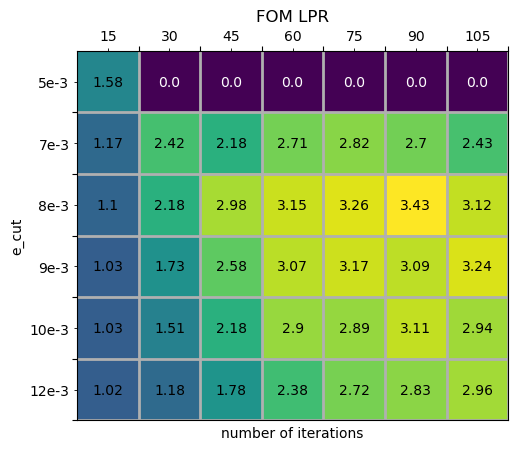

In [81]:
fom_0 = np.array([1.58, 0, 0, 0, 0, 0, 0])
fom_1 = np.array([1.17, 2.42, 2.18, 2.71, 2.82, 2.70, 2.43])
fom_2 = np.array([1.1, 2.18, 2.98, 3.15, 3.26, 3.43, 3.12])
fom_3 = np.array([1.03, 1.73, 2.58, 3.07, 3.17, 3.09, 3.24])
fom_4 = np.array([1.03, 1.51, 2.18, 2.9, 2.89, 3.11, 2.94])
fom_5 = np.array([1.02, 1.18, 1.78, 2.38, 2.72, 2.83, 2.96])

array = np.hstack((fom_0, fom_1, fom_2, fom_3, fom_4, fom_5)).reshape(-1,fom_0.shape[0])
x_label = [15, 30, 45, 60, 75, 90, 105]
x_label_inv = [105, 90, 75, 60, 45, 30, 15]
y_label = ['5e-3', '7e-3', '8e-3', '9e-3', '10e-3', '12e-3']

plot_2Dhist(array, x_label, y_label, title = 'FOM LPR', xlabel_title = 'number of iterations', ylabel_title = 'e_cut')

3.13
2.31
2.7199999999999998


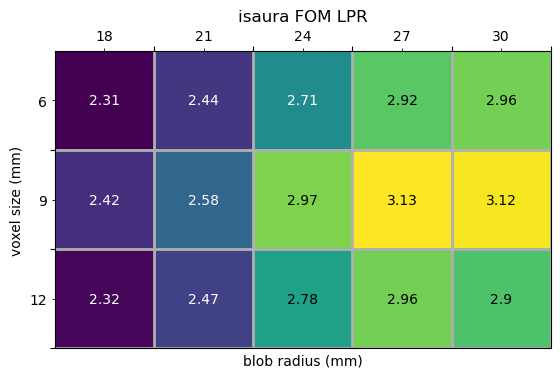

In [28]:
fom_0 = np.array([2.31, 2.44, 2.71, 2.92, 2.96])
fom_1 = np.array([2.42, 2.58, 2.97, 3.13, 3.12])
fom_2 = np.array([2.32, 2.47, 2.78, 2.96, 2.9])

array = np.hstack((fom_0, fom_1, fom_2)).reshape(-1,fom_0.shape[0])
x_label = [18, 21, 24, 27, 30]
y_label = [6, 9, 12]

plot_2Dhist(array, x_label, y_label, title = 'isaura FOM LPR', xlabel_title = 'blob radius (mm)', ylabel_title = 'voxel size (mm)')

64.0
57.0
60.5


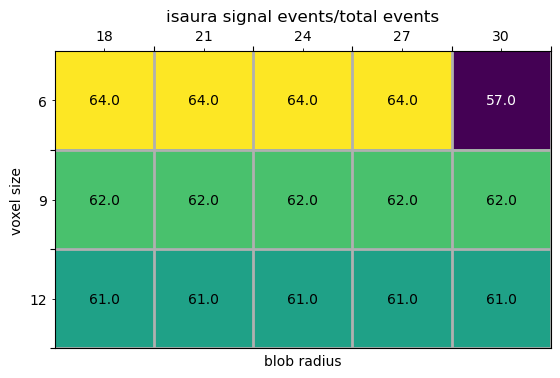

In [27]:
fom_0 = np.array([np.round((942/1477)*100), np.round((942/1477)*100), np.round((942/1476)*100), np.round((942/1477)*100), np.round((841/1475)*100)])
fom_1 = np.array([np.round((1137/1825)*100), np.round((1137/1825)*100), np.round((1137/1824)*100), np.round((1137/1824)*100), np.round((1136/1823)*100)])
fom_2 = np.array([np.round((1224/2003)*100), np.round((1224/2003)*100), np.round((1224/2002)*100), np.round((1224/2003)*100), np.round((1223/2001)*100)])

array = np.hstack((fom_0, fom_1, fom_2)).reshape(-1,fom_0.shape[0])
x_label = [18, 21, 24, 27, 30]
y_label = [6, 9, 12]

plot_2Dhist(array, x_label, y_label, title = 'isaura signal events/total events', xlabel_title = 'blob radius', ylabel_title = 'voxel size')

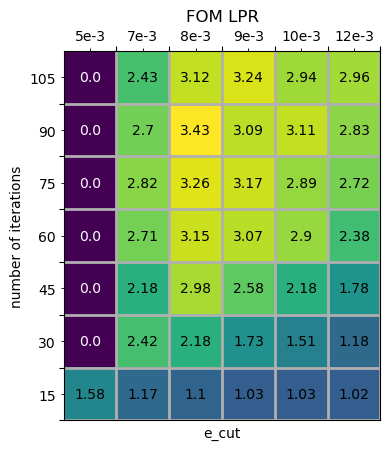

In [4]:
# flip along x/y
plot_2Dhist(np.flip(array.T, axis = 0), y_label, x_label_inv, title = 'FOM LPR', xlabel_title = 'e_cut', ylabel_title = 'number of iterations')

In [14]:
#test = pd.read_hdf('../../../../Downloads/tmp_out/testing_arena/testing_full_output_again.h5',
                    #)
#hold = pd.HDFStore('../../../../Downloads/tmp_out/testing_arena/testing_full_output_again.h5')
filename = '../../../../Downloads/tmp_out/testing_arena/fiducial.h5'
hold = pd.HDFStore(filename)
store = hold.keys()
hold.close()
display(store)

['/105_12e-3',
 '/105_5e-3',
 '/105_8e-3',
 '/105_9e-3',
 '/15_10e-3',
 '/15_5e-3',
 '/15_7e-3',
 '/15_8e-3',
 '/15_9e-3',
 '/30_10e-3',
 '/30_5e-3',
 '/30_7e-3',
 '/30_8e-3',
 '/45_10e-3',
 '/45_12e-3',
 '/45_5e-3',
 '/45_7e-3',
 '/60_12e-3',
 '/60_7e-3',
 '/75_10e-3',
 '/75_5e-3',
 '/75_7e-3',
 '/75_8e-3',
 '/90_10e-3',
 '/90_5e-3',
 '/90_7e-3',
 '/90_8e-3',
 '/90_9e-3']

In [15]:
# create pandas dataframe that assigns everything FOM-wise based on this

# collect unique n_iter and e_cut values

# sanitise
remove = [x.replace("/", "") for x in store]
split = [(x.split("_")) for x in remove]

# collect all unique first elements (n_iter)
unique_0s = list(set([x[0] for i, x in enumerate(split)]))
print(unique_0s)
unique_1s = list(set([x[1] for i, x in enumerate(split)]))
print(unique_1s)
print(split)
# organise and add leading zero to column (1s)
unique_0s_ = sorted(unique_0s, key=float)
unique_1s_ = sorted(unique_1s, key=float)
unique_1s_ = ["n_iter"] + unique_1s_

# create pandas dataframe with these as the axis
df = pd.DataFrame(columns = unique_1s_)

['45', '105', '15', '60', '75', '30', '90']
['10e-3', '8e-3', '5e-3', '12e-3', '7e-3', '9e-3']
[['105', '12e-3'], ['105', '5e-3'], ['105', '8e-3'], ['105', '9e-3'], ['15', '10e-3'], ['15', '5e-3'], ['15', '7e-3'], ['15', '8e-3'], ['15', '9e-3'], ['30', '10e-3'], ['30', '5e-3'], ['30', '7e-3'], ['30', '8e-3'], ['45', '10e-3'], ['45', '12e-3'], ['45', '5e-3'], ['45', '7e-3'], ['60', '12e-3'], ['60', '7e-3'], ['75', '10e-3'], ['75', '5e-3'], ['75', '7e-3'], ['75', '8e-3'], ['90', '10e-3'], ['90', '5e-3'], ['90', '7e-3'], ['90', '8e-3'], ['90', '9e-3']]


In [16]:
display(df)

,n_iter,5e-3,7e-3,8e-3,9e-3,10e-3,12e-3


In [17]:
# start adding rows babee
for i in range(len(unique_0s_)):
    df.loc[i] = [unique_0s_[i]] + list(np.full(shape=len(unique_1s), fill_value=np.nan))

# set it as the index as well
df.set_index('n_iter', inplace=True)

In [18]:
display(df)

,5e-3,7e-3,8e-3,9e-3,10e-3,12e-3
n_iter,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# collect the data from each table in the h5 dataframe
for i in range(len(store)):
    # reformat store data to allow for correct indexing
    remove = store[i].replace("/", "")
    split = remove.split("_")

    play_thing = pd.read_hdf(filename,key=store[i])
    play_thing.set_index('Cut', inplace=True)
    fom_val = play_thing.loc['FOM_MAX - blob2_E_val (MeV)', 'Relative Efficiency']
     
    df.at[split[0], split[1]] = fom_val
display(df)

['105', '12e-3']
2.9591990052085815
['105', '5e-3']
0.0
['105', '8e-3']
3.122031003657531
['105', '9e-3']
3.23935649036633
['15', '10e-3']
1.031089063013224
['15', '5e-3']
1.5811388300841895
['15', '7e-3']
1.1704711853090635
['15', '8e-3']
1.1094630221325439
['15', '9e-3']
1.0331282498580523
['30', '10e-3']
1.5051494546562212
['30', '5e-3']
0.0
['30', '7e-3']
2.425161727134389
['30', '8e-3']
2.1782824672030086
['45', '10e-3']
2.181210391911297
['45', '12e-3']
1.7757159873973896
['45', '5e-3']
0.0
['45', '7e-3']
2.183377808155598
['60', '12e-3']
2.3824926440062857
['60', '7e-3']
2.713573784810155
['75', '10e-3']
2.894870062850058
['75', '5e-3']
0.0
['75', '7e-3']
2.8206062807938648
['75', '8e-3']
3.2626748182177923
['90', '10e-3']
3.112288972280184
['90', '5e-3']
0.0
['90', '7e-3']
2.6997502849141286
['90', '8e-3']
3.4347921397788808
['90', '9e-3']
3.0955638603457856


,5e-3,7e-3,8e-3,9e-3,10e-3,12e-3
n_iter,,,,,,
15,1.581139,1.170471,1.109463,1.033128,1.031089,NaN
30,0.0,2.425162,2.178282,NaN,1.505149,NaN
45,0.0,2.183378,NaN,NaN,2.18121,1.775716
60,NaN,2.713574,NaN,NaN,NaN,2.382493
75,0.0,2.820606,3.262675,NaN,2.89487,NaN
90,0.0,2.69975,3.434792,3.095564,3.112289,NaN
105,0.0,NaN,3.122031,3.239356,NaN,2.959199


In [42]:
print(len(df.index))
print(df.index[6])

7
105


In [111]:
fom_01 = df.loc['15']
print(fom_01[1])
print(fom_01[0])
print(df.index[0])
fom_list = []
for i in range(len(df.index)):
    fom_list.append(df.loc[df.index[i]].to_numpy())
    
fom_list = np.array(fom_list)
#reshape into x,y array
x_vals = (df.columns).to_list()
y_vals = (df.index).to_list()


1.1704711853090635
1.5811388300841895
15


In [112]:
print(fom_list.T.shape)

(6, 7)


In [113]:
print(fom_list)
print(x_vals)
print(y_vals)

[[1.5811388300841895 1.1704711853090635 1.1094630221325439
  1.0331282498580523 1.031089063013224 nan]
 [0.0 2.425161727134389 2.1782824672030086 nan 1.5051494546562212 nan]
 [0.0 2.183377808155598 nan nan 2.181210391911297 1.7757159873973896]
 [nan 2.713573784810155 nan nan nan 2.3824926440062857]
 [0.0 2.8206062807938648 3.2626748182177923 nan 2.894870062850058 nan]
 [0.0 2.6997502849141286 3.4347921397788808 3.0955638603457856
  3.112288972280184 nan]
 [0.0 nan 3.122031003657531 3.23935649036633 nan 2.9591990052085815]]
['5e-3', '7e-3', '8e-3', '9e-3', '10e-3', '12e-3']
['15', '30', '45', '60', '75', '90', '105']


TypeError: Image data of dtype object cannot be converted to float

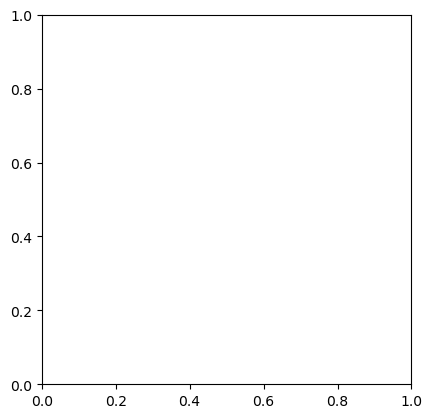

In [126]:
plot_2Dhist(fom_list.T, x_vals, y_vals, title = 'FOM LPR', xlabel_title = 'number of iterations', ylabel_title = 'e_cut')

In [124]:
#plt.imshow(fom_01, interpolation="none")
print(fom_list.T, fom_list.T.shape)
print("")
print(array, array.shape)
print(fom_list.T[3][6])
print(array[3][6])

# set nans to zeros
fom_list[np.isnan(fom_list.astype(float))] = 0
#print(fom_list.T[0][3].)

[[1.5811388300841895 0.0 0.0 nan 0.0 0.0 0.0]
 [1.1704711853090635 2.425161727134389 2.183377808155598
  2.713573784810155 2.8206062807938648 2.6997502849141286 nan]
 [1.1094630221325439 2.1782824672030086 nan nan 3.2626748182177923
  3.4347921397788808 3.122031003657531]
 [1.0331282498580523 nan nan nan nan 3.0955638603457856 3.23935649036633]
 [1.031089063013224 1.5051494546562212 2.181210391911297 nan
  2.894870062850058 3.112288972280184 nan]
 [nan nan 1.7757159873973896 2.3824926440062857 nan nan
  2.9591990052085815]] (6, 7)

[[1.58 0.   0.   0.   0.   0.   0.  ]
 [1.17 2.42 2.18 2.71 2.82 2.7  2.43]
 [1.1  2.18 2.98 3.15 3.26 3.43 3.12]
 [1.03 1.73 2.58 3.07 3.17 3.09 3.24]
 [1.03 1.51 2.18 2.9  2.89 3.11 2.94]
 [1.02 1.18 1.78 2.38 2.72 2.83 2.96]] (6, 7)
3.23935649036633
3.24


[[1.58 1.17 1.11 1.03 1.03 0.  ]
 [0.   2.43 2.18 0.   1.51 0.  ]
 [0.   2.18 0.   0.   2.18 1.78]
 [0.   2.71 0.   0.   0.   2.38]
 [0.   2.82 3.26 0.   2.89 0.  ]
 [0.   2.7  3.43 3.1  3.11 0.  ]
 [0.   0.   3.12 3.24 0.   2.96]]
float64


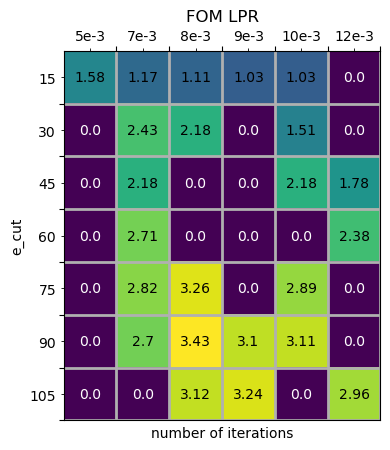

In [133]:
print(fom_list)
print(fom_list.dtype)
fom_list = np.round(fom_list.astype(float), decimals=2)
plot_2Dhist(fom_list, x_vals, y_vals, title = 'FOM LPR', xlabel_title = 'number of iterations', ylabel_title = 'e_cut')

In [8]:
# It works! Functionalise
def scrape_FOM_data(data_path):

    # collect data
    hold = pd.HDFStore(data_path)
    store = hold.keys()
    hold.close()

    # sanitise
    remove = [x.replace("/", "") for x in store]
    split = [(x.split("_")) for x in remove]

    # collect all unique first elements (n_iter)
    unique_0s = list(set([x[0] for i, x in enumerate(split)]))
    # and second elements
    unique_1s = list(set([x[1] for i, x in enumerate(split)]))

    # organise and add leading zero to column (1s)
    unique_0s_ = sorted(unique_0s, key=float)
    unique_1s_ = sorted(unique_1s, key=float)
    unique_1s_ = ["n_iter"] + unique_1s_
    
    # create pandas dataframe with these as the axis
    df = pd.DataFrame(columns = unique_1s_)
    
    # start adding rows babee
    for i in range(len(unique_0s_)):
    	df.loc[i] = [unique_0s_[i]] + list(np.full(shape=len(unique_1s), fill_value=np.nan))

    # set it as the index as well
    df.set_index('n_iter', inplace=True)
    
    # collect the data from each table in the h5 dataframe
    for i in range(len(store)):
        # reformat store data to allow for correct indexing
        remove = store[i].replace("/", "")
        split = remove.split("_")

        play_thing = pd.read_hdf(data_path,key=store[i])
        play_thing.set_index('Cut', inplace=True)
        fom_val = play_thing.loc['FOM_MAX - blob2_E_val (MeV)', 'Relative Efficiency']
            
        df.at[split[0], split[1]] = fom_val
	
    fom_list = []
    for i in range(len(df.index)):
        fom_list.append(df.loc[df.index[i]].to_numpy())
    
    fom_list = np.array(fom_list)
    #reshape into x,y array
    x_vals = (df.columns).to_list()
    y_vals = (df.index).to_list()
    
    # set nans to zeros
    fom_list[np.isnan(fom_list.astype(float))] = 0
    
    fom_list = np.round(fom_list.astype(float), decimals=2)
    
    plot_2Dhist(fom_list, x_vals, y_vals, title = 'FOM LPR', xlabel_title = 'number of iterations', ylabel_title = 'e_cut')
    

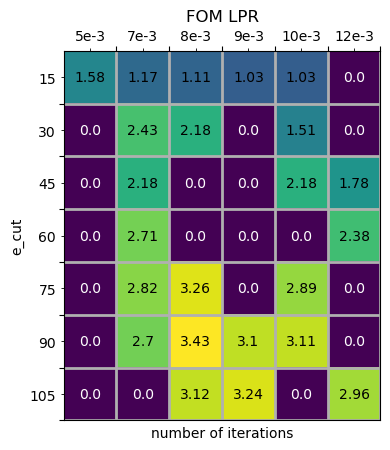

In [11]:
scrape_FOM_data('../../../../Downloads/tmp_out/testing_arena/fiducial.h5')